In [1]:
import re
import pandas as pd
import time
import numpy as np

# Set pandas options to display all columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows


In [2]:
years = ['2021', '2022', '2023', '2024']
races = ['TOR330', 'TOR450', 'TOR130']

## Looping through scraped data from 100X100trail

In [ ]:
races = ['TOR330'
        # ,'TOR450'
        ]
years = ['2023']

TORX_df = {}

for race in races:
    for year in years:
        df = pd.read_excel(f'{race} Data/100x100trail/aid_station_{race}_{year}.xlsx')
        print(f'{race}_{year} {df.shape}')
        # Store the DataFrame in the dictionary with a key like 'TOR330_2021'
        TORX_df[f'{race}_{year}'] = df
    print('*'*50)
        
#         print(f"Data read from f'{race}_{year}.xlsx'")


In [ ]:
TORX_df_concat = pd.concat(TORX_df)

In [ ]:
TOR330 = TORX_df_concat[TORX_df_concat['Year'] == 2023]
TOR330.head()

#### TO DO LIST: 
- Drop the race column
- Change TIME to a time date
- pivot the dataset

- change the start time
- Create wave
- reorder the columns in order
- count how many blanks?
- is BAILE too many blanks?
- change the status to FALSE if more than one miss 
- pivot tnad lead?


### Exploring whether RITIRIO is the same as FALSE

In [ ]:
retired_but_with_status_true = TOR330[(TOR330['Place'].str.contains('RITIRO')) &
       (TOR330['Status'] == True)]

list_of_names_retired_but_with_status_true  = list(retired_but_with_status_true['Name'].unique())

retired_but_with_status_true 

In [7]:
TOR330[TOR330['Place'].str.contains('RITIRO')].shape

(135, 10)

In [8]:
# How many have not finished
len(list(TOR330['Name'][TOR330['Status'] == False].reset_index(drop = True).unique()))

576

### Cleaning Place column

In [9]:
TOR330['Place'].unique()

array(['660 - FINISH 330', '650 - Monte de la Saxe 450',
       '640 - Pas Entre Deux Sauts 450', '630 - Rif. Frassati 450',
       '620 - Bosses 330', '610 - Ponteille Desot 450',
       '590 - Rif. Champillon 450', '581 - Ollomont OUT 330',
       '580 - Ollomont IN 330', '570 - Berio Damon 330',
       '565 - Col Brison 330', '551 - Oyace OUT 330',
       '550 - Oyace IN 330', '540 - Biv. R. Clermont 330',
       '530 - Rif. Cuney 330', '520 - Rif. Magià 330',
       '490 - Rif. Barmasse 330', '481 - Valtournenche OUT 330',
       '480 - Valtournenche IN 330', '470 - Rif. Grand Tournalin 330',
       '460 - Champoluc 330', '450 - Rif. Alpenzu 330',
       '381 - Gressoney OUT 330', '380 - Gressoney IN 330', '370 - Loo',
       '360 - Niel La Gruba 450', '350 - Col della Vecchia',
       '340 - Lago Chiaro', '330 - Rif. della Barma 450',
       '320 - Rif. Coda 450', '310 - Sassa', '300 - Perloz',
       '291 - Donnas OUT 450', '290 - Donnas IN 330', '260 - Pontboset',
       '250 - 

In [10]:
TOR330['aid_stations'] = TOR330['Place'].str.split(r'^\d+ - ').str.get(-1)
TOR330['aid_stations'] = TOR330['aid_stations'].str.split(' - RITIRO').str.get(0)
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace(r'\d+', '', regex=True)
TOR330['aid_stations'] = TOR330['aid_stations'].str.split('|').str.get(0)
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif.', 'Rifugio')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Biv.','Bivacco')
TOR330['aid_stations'] = TOR330['aid_stations'].str.strip()
TOR330['aid_stations'].unique()

C:\Users\Karina\AppData\Local\Temp\ipykernel_4928\1017256883.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif.', 'Rifugio')
C:\Users\Karina\AppData\Local\Temp\ipykernel_4928\1017256883.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Biv.','Bivacco')


array(['FINISH', 'Monte de la Saxe', 'Pas Entre Deux Sauts',
       'Rifugio Frassati', 'Bosses', 'Ponteille Desot',
       'Rifugio Champillon', 'Ollomont OUT', 'Ollomont IN', 'Berio Damon',
       'Col Brison', 'Oyace OUT', 'Oyace IN', 'Bivacco R. Clermont',
       'Rifugio Cuney', 'Rifugio Magià', 'Rifugio Barmasse',
       'Valtournenche OUT', 'Valtournenche IN', 'Rifugio Grand Tournalin',
       'Champoluc', 'Rifugio Alpenzu', 'Gressoney OUT', 'Gressoney IN',
       'Loo', 'Niel La Gruba', 'Col della Vecchia', 'Lago Chiaro',
       'Rifugio della Barma', 'Rifugio Coda', 'Sassa', 'Perloz',
       'Donnas OUT', 'Donnas IN', 'Pontboset', 'Chardonney',
       'Rifugio Dondena', 'Goilles', 'Cogne OUT', 'Cogne IN',
       'Rifugio Sella', 'Eaux Rousse', 'Rhemes-Notre-Dame', 'Chalet Epee',
       'Valgrisenche OUT', 'Valgrisenche IN', 'Planaval',
       'Bivacco Zappelli', 'Rifugio Deffeyes', 'La Thuile',
       'Baite Youlaz', 'START', 'PETTORALI', 'Parco Bollino',
       'Bruson Arp', 

In [11]:
# dropping rows with PETTORALI
TOR330 = TOR330[~(TOR330['Place'].str.contains('PETTORALI'))]

In [12]:
TOR330 = TOR330.reset_index(drop=True)
TOR330.head()

Name  Bib Sex Nationality    Race  Year Category  \
0  Colle Franco    2   M          IT  TOR330  2023       V1   
1  Colle Franco    2   M          IT  TOR330  2023       V1   
2  Colle Franco    2   M          IT  TOR330  2023       V1   
3  Colle Franco    2   M          IT  TOR330  2023       V1   
4  Colle Franco    2   M          IT  TOR330  2023       V1   

                            Place                       Time  Status  \
0                660 - FINISH 330  2023-09-13T04:39:16+02:00    True   
1      650 - Monte de la Saxe 450  2023-09-13T03:52:25+02:00    True   
2  640 - Pas Entre Deux Sauts 450  2023-09-13T02:23:36+02:00    True   
3         630 - Rif. Frassati 450  2023-09-13T00:45:25+02:00    True   
4                620 - Bosses 330  2023-09-12T22:30:41+02:00    True   

           aid_stations  
0                FINISH  
1      Monte de la Saxe  
2  Pas Entre Deux Sauts  
3      Rifugio Frassati  
4                Bosses

### Reading in TOR330 Data on elevation / distance

A copy of the original 'TOR330 - Downloads.xlsx' and 'TOR450 - Downloads.xlsx' and were changed to reflect the downloaded 100x100trail data 

In [13]:
TOR330_aid_station_info_df = pd.read_excel('TOR330 Data/TOR330 - Timetable.xlsx', sheet_name = 'Sheet1')

# organising the data in the correct order by 'distance\nfrom START\n(km)'
TOR330_aid_station_info_df = TOR330_aid_station_info_df.sort_values(by ='distance\nfrom START\n(km)')

TOR330_aid_station_list= list(TOR330_aid_station_info_df['100X100trail Aid Stations'].unique())

print(TOR330_aid_station_list)

['START', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 'Bivacco Zappelli', 'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee', 'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella', 'Cogne OUT', 'Cogne IN', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda', 'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia', 'Niel La Gruba', 'Loo', 'Gressoney IN', 'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin', 'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton', 'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace IN', 'Bruson Arp', 'Col Brison', 'Berio Damon', 'Ollomont IN', 'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses', 'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe', 'FINISH']


In [14]:
TOR330_aid_station_info_df.head()

100X100trail Aid Stations          Waypoint  altitude\n(m)  \
0                     START             Start           1224   
1              Baite Youlaz      Baite Youlaz           2036   
2                 La Thuile         La Thuile           1468   
3          Rifugio Deffeyes  Rifugio Deffeyes           2489   
4          Bivacco Zappelli  Bivacco Zappelli           2273   

   distance\nfrom START\n(km)  distance\nfrom previous point\n(km)  \
0                        0.00                                 0.00   
1                       12.83                                12.83   
2                       18.98                                 6.15   
3                       27.86                                 8.88   
4                       32.78                                 4.92   

   D+\nfrom START (m)  D+\nfrom previous point\n(m)  \
0                   0                             0   
1                1467                             2   
2                1602                           135   
3                2828                          1226   
4                3255                           427   

   D-\nfrom previous point\n(m) POI tipology* Wave 1 Cut off time  \
0                           0.0         START                 NaN   
1                         534.0             R                 NaN   
2                         702.0           R+A            D3 15.30   
3                         205.0             R                 NaN   
4                         585.0           R+A                 NaN   

  Wave 2 Cut off time  
0                 NaN  
1                 NaN  
2            D3 17.30  
3                 NaN  
4                 NaN

In [15]:
# TOR450_aid_station_info_df = pd.read_excel('TOR450 Data/TOR450 - Timetable.xlsx', sheet_name = 'Sheet1')

# # organising the data in the correct order by 'distance\nfrom START\n(km)'
# TOR450_aid_station_info_df = TOR450_aid_station_info_df.sort_values(by ='distance\nfrom START\n(km)')


### Cleaning Time column

In [16]:
TOR330.head()

Name  Bib Sex Nationality    Race  Year Category  \
0  Colle Franco    2   M          IT  TOR330  2023       V1   
1  Colle Franco    2   M          IT  TOR330  2023       V1   
2  Colle Franco    2   M          IT  TOR330  2023       V1   
3  Colle Franco    2   M          IT  TOR330  2023       V1   
4  Colle Franco    2   M          IT  TOR330  2023       V1   

                            Place                       Time  Status  \
0                660 - FINISH 330  2023-09-13T04:39:16+02:00    True   
1      650 - Monte de la Saxe 450  2023-09-13T03:52:25+02:00    True   
2  640 - Pas Entre Deux Sauts 450  2023-09-13T02:23:36+02:00    True   
3         630 - Rif. Frassati 450  2023-09-13T00:45:25+02:00    True   
4                620 - Bosses 330  2023-09-12T22:30:41+02:00    True   

           aid_stations  
0                FINISH  
1      Monte de la Saxe  
2  Pas Entre Deux Sauts  
3      Rifugio Frassati  
4                Bosses

In [17]:
# 2024-09-11T07:08:32+02:00

# Split the 'Time' column to remove the timezone offset
TOR330['new_Time'] = TOR330['Time'].str.split('+').str[0]

# Convert the cleaned time string to a datetime object
TOR330['new_Time'] = pd.to_datetime(TOR330['new_Time'])

# # Add the 2-hour offset using timedelta
# TOR330['new_Time'] = TOR330['new_Time'] + pd.to_timedelta('02:00:00')

# Preview the DataFrame
TOR330.head()

Name  Bib Sex Nationality    Race  Year Category  \
0  Colle Franco    2   M          IT  TOR330  2023       V1   
1  Colle Franco    2   M          IT  TOR330  2023       V1   
2  Colle Franco    2   M          IT  TOR330  2023       V1   
3  Colle Franco    2   M          IT  TOR330  2023       V1   
4  Colle Franco    2   M          IT  TOR330  2023       V1   

                            Place                       Time  Status  \
0                660 - FINISH 330  2023-09-13T04:39:16+02:00    True   
1      650 - Monte de la Saxe 450  2023-09-13T03:52:25+02:00    True   
2  640 - Pas Entre Deux Sauts 450  2023-09-13T02:23:36+02:00    True   
3         630 - Rif. Frassati 450  2023-09-13T00:45:25+02:00    True   
4                620 - Bosses 330  2023-09-12T22:30:41+02:00    True   

           aid_stations            new_Time  
0                FINISH 2023-09-13 04:39:16  
1      Monte de la Saxe 2023-09-13 03:52:25  
2  Pas Entre Deux Sauts 2023-09-13 02:23:36  
3      Rifugio Frassati 2023-09-13 00:45:25  
4                Bosses 2023-09-12 22:30:41

In [18]:
TOR330.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41758 entries, 0 to 41757
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          41758 non-null  object        
 1   Bib           41758 non-null  int64         
 2   Sex           41758 non-null  object        
 3   Nationality   41758 non-null  object        
 4   Race          41758 non-null  object        
 5   Year          41758 non-null  int64         
 6   Category      41758 non-null  object        
 7   Place         41758 non-null  object        
 8   Time          41758 non-null  object        
 9   Status        41758 non-null  bool          
 10  aid_stations  41758 non-null  object        
 11  new_Time      41758 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(2), object(8)
memory usage: 3.5+ MB


### PIVOTING the Dataset

In [19]:
# Pivot the data so that each year appears in its own column
pivoted_TOR330 = TOR330.pivot_table(
    index=['Name','Bib', 'Sex', 'Nationality', 'Category', 'Race','Year', 'Status'],
    columns='aid_stations',  
    values='new_Time',
    aggfunc='first'  # Ensures only the first match is kept in case of duplicates
).reset_index()

# Rename columns for clarity
pivoted_TOR330.columns.name = None  # Remove multi-index name
pivoted_TOR330 = pivoted_TOR330.rename_axis(None, axis=1)  # Remove year axis name
pivoted_TOR330.head()

Name   Bib Sex Nationality Category    Race  Year  Status  \
0         Abe Takashi   443   M          JP       V1  TOR330  2023    True   
1         Acerbi Luca  1290   M          IT       V3  TOR330  2023   False   
2  Adamczyk Guillaume  1215   M          BE       V2  TOR330  2023   False   
3        Affre Roxane  1320   F          FR       V2  TOR330  2023   False   
4  Agnoletti Maurizio   311   M          IT       V3  TOR330  2023    True   

         Baite Youlaz         Berio Damon Bivacco R. Clermont  \
0 2023-09-10 12:32:30 2023-09-15 12:13:32 2023-09-15 03:52:22   
1 2023-09-10 15:26:07                 NaT                 NaT   
2 2023-09-10 15:30:04                 NaT                 NaT   
3 2023-09-10 16:00:38                 NaT                 NaT   
4 2023-09-10 12:57:54 2023-09-15 13:52:37 2023-09-15 06:59:16   

     Bivacco Zappelli              Bosses          Bruson Arp  \
0 2023-09-10 18:03:33 2023-09-15 21:56:14 2023-09-15 10:26:55   
1 2023-09-10 22:10:03                 NaT                 NaT   
2 2023-09-10 22:48:46                 NaT                 NaT   
3 2023-09-10 23:22:41                 NaT                 NaT   
4 2023-09-10 19:18:44 2023-09-16 01:31:20                 NaT   

          Chalet Epee           Champoluc          Chardonney  \
0 2023-09-11 03:26:45 2023-09-14 04:17:13 2023-09-12 08:04:34   
1                 NaT                 NaT                 NaT   
2                 NaT                 NaT                 NaT   
3                 NaT                 NaT                 NaT   
4 2023-09-11 04:37:06 2023-09-14 07:42:25 2023-09-12 10:24:24   

             Cogne IN           Cogne OUT          Col Brison  \
0 2023-09-11 19:56:09 2023-09-12 00:51:44 2023-09-15 11:15:30   
1                 NaT                 NaT                 NaT   
2                 NaT                 NaT                 NaT   
3                 NaT                 NaT                 NaT   
4 2023-09-11 23:19:05 2023-09-12 02:08:12                 NaT   

    Col della Vecchia           Donnas IN          Donnas OUT  \
0 2023-09-13 09:33:26 2023-09-12 12:14:56                 NaT   
1                 NaT                 NaT                 NaT   
2                 NaT                 NaT                 NaT   
3                 NaT                 NaT                 NaT   
4 2023-09-13 13:50:17 2023-09-12 15:02:28 2023-09-12 17:08:31   

          Eaux Rousse              FINISH             Goilles  \
0 2023-09-11 11:42:34 2023-09-16 10:15:52 2023-09-12 01:57:21   
1                 NaT                 NaT                 NaT   
2                 NaT                 NaT                 NaT   
3                 NaT                 NaT                 NaT   
4 2023-09-11 14:17:34 2023-09-16 12:16:45 2023-09-12 03:44:14   

         Gressoney IN       Gressoney OUT           La Thuile  \
0 2023-09-13 17:53:08 2023-09-13 21:42:28 2023-09-10 13:34:27   
1                 NaT                 NaT 2023-09-10 16:30:04   
2                 NaT                 NaT 2023-09-10 16:47:21   
3                 NaT                 NaT 2023-09-10 17:10:31   
4 2023-09-13 21:12:03 2023-09-14 00:00:02 2023-09-10 14:00:01   

          Lago Chiaro                 Loo Mont de la Saxe    Monte de la Saxe  \
0 2023-09-13 06:56:30 2023-09-13 15:37:21             NaT 2023-09-16 08:39:35   
1                 NaT                 NaT             NaT                 NaT   
2                 NaT                 NaT             NaT                 NaT   
3                 NaT                 NaT             NaT                 NaT   
4 2023-09-13 11:28:25 2023-09-13 19:19:40             NaT 2023-09-16 11:18:39   

        Niel La Gruba         Ollomont IN        Ollomont OUT  \
0 2023-09-13 12:18:26 2023-09-15 12:44:26 2023-09-15 15:41:40   
1                 NaT                 NaT                 NaT   
2                 NaT                 NaT                 NaT   
3                 NaT                 NaT                 NaT   

In [20]:
pivoted_TOR330.columns

Index(['Name', 'Bib', 'Sex', 'Nationality', 'Category', 'Race', 'Year',
       'Status', 'Baite Youlaz', 'Berio Damon', 'Bivacco R. Clermont',
       'Bivacco Zappelli', 'Bosses', 'Bruson Arp', 'Chalet Epee', 'Champoluc',
       'Chardonney', 'Cogne IN', 'Cogne OUT', 'Col Brison',
       'Col della Vecchia', 'Donnas IN', 'Donnas OUT', 'Eaux Rousse', 'FINISH',
       'Goilles', 'Gressoney IN', 'Gressoney OUT', 'La Thuile', 'Lago Chiaro',
       'Loo', 'Mont de la Saxe', 'Monte de la Saxe', 'Niel La Gruba',
       'Ollomont IN', 'Ollomont OUT', 'Oyace IN', 'Oyace OUT', 'Parco Bollino',
       'Pas Entre Deux Sauts', 'Perloz', 'Planaval', 'Pontboset',
       'Ponteille Desot', 'Rhemes-Notre-Dame', 'Rifugio Alpenzu',
       'Rifugio Barmasse', 'Rifugio Champillon', 'Rifugio Coda',
       'Rifugio Cuney', 'Rifugio Deffeyes', 'Rifugio Dondena',
       'Rifugio Frassati', 'Rifugio Grand Tournalin', 'Rifugio Magià',
       'Rifugio Miserin', 'Rifugio Sella', 'Rifugio della Barma', 'START',
   

In [21]:
pivoted_TOR330 = pivoted_TOR330[[
'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race','Category', 'Status',    
'START', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 'Bivacco Zappelli',
    'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee', 'Rhemes-Notre-Dame',
    'Eaux Rousse', 'Rifugio Sella', 'Cogne IN', 'Cogne OUT', 'Goilles', 'Rifugio Dondena', 
    'Chardonney', 'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
    'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia', 'Niel La Gruba', 'Loo',
    'Gressoney IN', 'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin', 
    'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
    'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 
    'Oyace IN', 'Bruson Arp', 'Col Brison', 'Berio Damon', 'Ollomont IN', 
    'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses', 'Rifugio Frassati', 
    'Pas Entre Deux Sauts', 'Monte de la Saxe', 'FINISH'
    
]]

pivoted_TOR330.head()

Name   Bib Sex Nationality  Year    Race Category  Status  \
0         Abe Takashi   443   M          JP  2023  TOR330       V1    True   
1         Acerbi Luca  1290   M          IT  2023  TOR330       V3   False   
2  Adamczyk Guillaume  1215   M          BE  2023  TOR330       V2   False   
3        Affre Roxane  1320   F          FR  2023  TOR330       V2   False   
4  Agnoletti Maurizio   311   M          IT  2023  TOR330       V3    True   

                START        Baite Youlaz           La Thuile  \
0                 NaT 2023-09-10 12:32:30 2023-09-10 13:34:27   
1 2023-09-10 11:22:44 2023-09-10 15:26:07 2023-09-10 16:30:04   
2 2023-09-10 11:50:58 2023-09-10 15:30:04 2023-09-10 16:47:21   
3 2023-09-10 11:19:55 2023-09-10 16:00:38 2023-09-10 17:10:31   
4 2023-09-10 09:36:43 2023-09-10 12:57:54 2023-09-10 14:00:01   

     Rifugio Deffeyes    Bivacco Zappelli            Planaval  \
0 2023-09-10 16:15:18 2023-09-10 18:03:33 2023-09-10 21:20:55   
1 2023-09-10 19:45:40 2023-09-10 22:10:03 2023-09-11 02:33:42   
2 2023-09-10 20:17:13 2023-09-10 22:48:46 2023-09-11 04:31:31   
3 2023-09-10 20:41:31 2023-09-10 23:22:41 2023-09-11 04:49:20   
4 2023-09-10 17:10:01 2023-09-10 19:18:44 2023-09-10 23:08:22   

      Valgrisenche IN    Valgrisenche OUT         Chalet Epee  \
0 2023-09-10 22:29:16 2023-09-11 01:27:00 2023-09-11 03:26:45   
1 2023-09-11 04:16:59                 NaT                 NaT   
2 2023-09-11 06:20:04                 NaT                 NaT   
3 2023-09-11 06:25:00                 NaT                 NaT   
4 2023-09-11 00:14:47 2023-09-11 01:41:40 2023-09-11 04:37:06   

    Rhemes-Notre-Dame         Eaux Rousse       Rifugio Sella  \
0 2023-09-11 06:14:38 2023-09-11 11:42:34 2023-09-11 17:49:52   
1                 NaT                 NaT                 NaT   
2                 NaT                 NaT                 NaT   
3                 NaT                 NaT                 NaT   
4 2023-09-11 08:01:45 2023-09-11 14:17:34 2023-09-11 21:15:55   

             Cogne IN           Cogne OUT             Goilles  \
0 2023-09-11 19:56:09 2023-09-12 00:51:44 2023-09-12 01:57:21   
1                 NaT                 NaT                 NaT   
2                 NaT                 NaT                 NaT   
3                 NaT                 NaT                 NaT   
4 2023-09-11 23:19:05 2023-09-12 02:08:12 2023-09-12 03:44:14   

      Rifugio Dondena          Chardonney           Pontboset  \
0 2023-09-12 06:34:58 2023-09-12 08:04:34 2023-09-12 09:48:36   
1                 NaT                 NaT                 NaT   
2                 NaT                 NaT                 NaT   
3                 NaT                 NaT                 NaT   
4 2023-09-12 08:35:02 2023-09-12 10:24:24 2023-09-12 12:14:35   

            Donnas IN          Donnas OUT              Perloz  \
0 2023-09-12 12:14:56                 NaT 2023-09-12 17:52:58   
1                 NaT                 NaT                 NaT   
2                 NaT                 NaT                 NaT   
3                 NaT                 NaT                 NaT   
4 2023-09-12 15:02:28 2023-09-12 17:08:31 2023-09-12 20:24:18   

                Sassa        Rifugio Coda Rifugio della Barma  \
0 2023-09-12 20:07:44 2023-09-12 22:30:52 2023-09-13 03:14:01   
1                 NaT                 NaT                 NaT   
2                 NaT                 NaT                 NaT   
3                 NaT                 NaT                 NaT   
4 2023-09-12 23:39:30 2023-09-13 02:14:19 2023-09-13 08:37:42   

          Lago Chiaro   Col della Vecchia       Niel La Gruba  \
0 2023-09-13 06:56:30 2023-09-13 09:33:26 2023-09-13 12:18:26   
1                 NaT                 NaT                 NaT   
2                 NaT                 NaT                 NaT   
3                 NaT                 NaT                 NaT   
4 2023-09-13 11:28:25 2023-09-13 13:50:17 2023-09-13 15:49:55   

                  Loo        

### Dealing with Anomalies

In [24]:

for name in list_of_names_retired_but_with_status_true:

    # Fixing the code with .loc[] for proper assignment
    pivoted_TOR330.loc[pivoted_TOR330['Name'] == name, 'FINISH'] = pd.NaT
    pivoted_TOR330.loc[pivoted_TOR330['Name'] == name, 'Status'] = False


In [26]:
pivoted_TOR330[pivoted_TOR330['Name'].str.contains('Smith')]

Name   Bib Sex Nationality  Year    Race Category  Status  \
917   Smith Gillian  1517   F          CA  2023  TOR330       V1   False   
918  Smith Jonathan  1321   M          AU  2023  TOR330       V2   False   
919     Smith Orran    98   M          IM  2023  TOR330       V1    True   

                  START        Baite Youlaz           La Thuile  \
917 2023-09-10 11:27:03 2023-09-10 16:04:18 2023-09-10 17:12:52   
918 2023-09-10 11:23:04 2023-09-10 15:11:28 2023-09-10 16:21:13   
919 2023-09-10 09:27:28 2023-09-10 12:07:26 2023-09-10 12:47:12   

       Rifugio Deffeyes    Bivacco Zappelli            Planaval  \
917 2023-09-10 20:36:45 2023-09-10 23:16:31 2023-09-11 03:41:08   
918 2023-09-10 19:20:49 2023-09-10 21:33:39 2023-09-11 01:39:44   
919 2023-09-10 15:24:45 2023-09-10 16:56:16 2023-09-10 19:46:04   

        Valgrisenche IN    Valgrisenche OUT         Chalet Epee  \
917 2023-09-11 04:54:24 2023-09-11 07:54:00                 NaT   
918 2023-09-11 02:59:33 2023-09-11 04:18:13 2023-09-11 06:45:55   
919 2023-09-10 20:41:39 2023-09-10 22:43:29 2023-09-11 00:23:37   

      Rhemes-Notre-Dame         Eaux Rousse       Rifugio Sella  \
917 2023-09-11 13:24:12                 NaT                 NaT   
918 2023-09-11 10:01:52 2023-09-11 16:27:10 2023-09-11 23:29:54   
919 2023-09-11 02:06:53 2023-09-11 05:39:05 2023-09-11 09:45:53   

               Cogne IN           Cogne OUT             Goilles  \
917                 NaT                 NaT                 NaT   
918 2023-09-12 04:17:39 2023-09-12 05:09:01 2023-09-12 06:59:09   
919 2023-09-11 11:17:40 2023-09-11 12:53:13 2023-09-11 14:00:54   

        Rifugio Dondena          Chardonney           Pontboset  \
917                 NaT                 NaT                 NaT   
918 2023-09-12 12:28:34 2023-09-12 14:24:15                 NaT   
919 2023-09-11 18:00:52 2023-09-11 19:18:13 2023-09-11 20:36:57   

              Donnas IN          Donnas OUT              Perloz  \
917                 NaT                 NaT                 NaT   
918                 NaT 2023-09-12 17:18:56                 NaT   
919 2023-09-11 22:24:14 2023-09-12 01:09:30 2023-09-12 02:51:32   

                  Sassa        Rifugio Coda Rifugio della Barma  \
917                 NaT                 NaT                 NaT   
918                 NaT                 NaT                 NaT   
919 2023-09-12 05:21:51 2023-09-12 07:36:17 2023-09-12 10:31:41   

            Lago Chiaro   Col della Vecchia       Niel La Gruba  \
917                 NaT                 NaT                 NaT   
918                 NaT                 NaT                 NaT   
919 2023-09-12 12:11:20 2023-09-12 13:43:30 2023-09-12 15:30:52   

                    Loo        Gressoney IN       Gressoney OUT  \
917                 NaT                 NaT                 NaT   
918                 NaT                 NaT                 NaT   
919 2023-09-12 19:44:56 2023-09-12 21:19:48 2023-09-12 22:01:53   

        Rifugio Alpenzu           Champoluc Rifugio Grand Tournalin  \
917                 NaT                 NaT                     NaT   
918                 NaT                 NaT                     NaT   
919 2023-09-12 23:16:09 2023-09-13 03:13:14     2023-09-13 06:34:09   

       Valtournenche IN   Valtournenche OUT    Rifugio Barmasse  \
917                 NaT                 NaT                 NaT   
918                 NaT                 NaT                 NaT   
919 2023-09-13 09:38:54 2023-09-13 10:33:45 2023-09-13 12:08:03   

                Vareton       Rifugio Magià       Rifugio Cuney  \
917                 NaT                 NaT                 NaT   
918                 NaT                 NaT                 NaT   
919 2023-09-13 13:38:00 2023-09-13 16:02:31 2023-09-13 17:59:59   

    Bivacco R. Clermont            Oyace IN          Bruson Arp  \
917                 NaT                 NaT                 NaT   
918                 NaT                 NaT                 NaT

### Start Line Issues

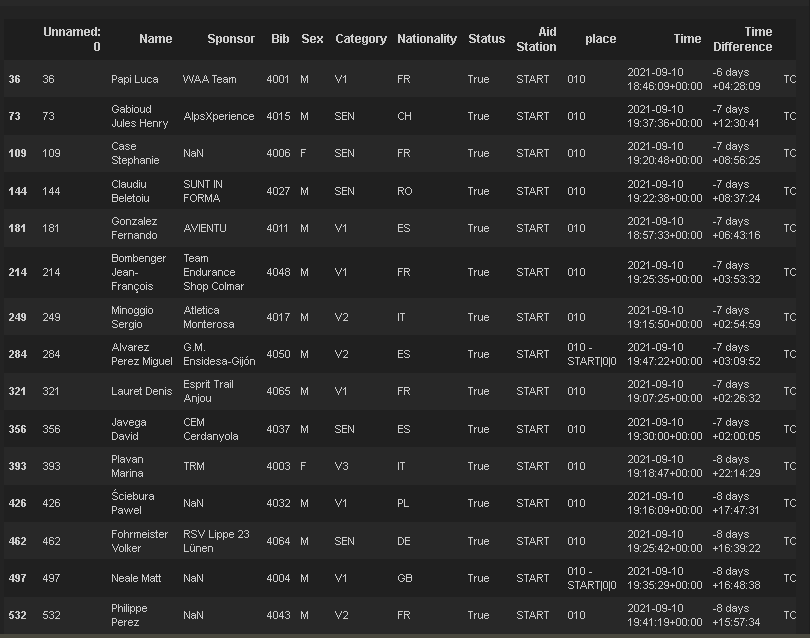

### Reading in TORX dates extracted from DUV

In [27]:
file = f'Database Data/TORX_duv_dates_df.xlsx'
dates_duv_df = pd.read_excel(file)

# Drop the intermediate columns if they're no longer needed
dates_duv_df = dates_duv_df.drop(columns=['Day_of_Week Start_Date'])    
dates_duv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Race        26 non-null     object        
 1   Year        26 non-null     int64         
 2   Start Date  26 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 752.0+ bytes


In [28]:
dates_duv_df

Race  Year          Start Date
0   TOR130  2024 2024-09-10 21:00:00
1   TOR130  2023 2023-09-12 21:00:00
2   TOR130  2022 2022-09-13 21:00:00
3   TOR130  2019 2019-09-10 21:00:00
4   TOR130  2018 2018-09-11 21:00:00
5   TOR130  2017 2017-09-13 21:00:00
6   TOR130  2021 2021-09-14 21:00:00
7   TOR330  2023 2023-09-10 10:00:00
8   TOR330  2021 2021-09-12 10:00:00
9   TOR330  2017 2017-09-10 10:00:00
10  TOR330  2024 2024-09-08 10:00:00
11  TOR330  2013 2013-09-08 10:00:00
12  TOR330  2022 2022-09-11 10:00:00
13  TOR330  2014 2014-09-07 10:00:00
14  TOR330  2019 2019-09-08 10:00:00
15  TOR330  2018 2018-09-09 10:00:00
16  TOR330  2016 2016-09-11 10:00:00
17  TOR330  2012 2012-09-09 10:00:00
18  TOR330  2011 2011-09-11 10:00:00
19  TOR330  2015 2015-09-13 10:00:00
20  TOR330  2010 2010-09-12 10:00:00
21  TOR450  2023 2023-09-08 20:00:00
22  TOR450  2024 2024-09-06 20:00:00
23  TOR450  2022 2022-09-09 20:00:00
24  TOR450  2019 2019-09-06 20:00:00
25  TOR450  2021 2021-09-10 20:00:00

### Adding dates into TOR330 and TOR4450

In [29]:
pivoted_TOR330['Year'] = pivoted_TOR330['Year'].astype('str')
dates_duv_df['Year'] = dates_duv_df['Year'].astype('str')

# have I dropped any rows?
print(pivoted_TOR330.shape)

# Merging on two columns: 'Race' and 'Year'
pivoted_TOR330_dates = pd.merge(pivoted_TOR330, dates_duv_df, on=['Race', 'Year'], how='inner')

# have I dropped any rows?
print(pivoted_TOR330_dates.shape)



(1094, 61)
(1094, 62)


In [30]:

pivoted_TOR330_dates['new_Start Date'] = np.where(
    pivoted_TOR330_dates['Bib'] < 1001, 
        pivoted_TOR330_dates['Start Date'], 
        pivoted_TOR330_dates['Start Date'] + pd.to_timedelta('02:00:00'))

pivoted_TOR330_dates['Wave'] = np.where(
    pivoted_TOR330_dates['Bib'] < 1001, 
        'Wave1', 
        'Wave2')

pivoted_TOR330_dates[pivoted_TOR330_dates['Bib']> 1001].head()

Name   Bib Sex Nationality  Year    Race Category  Status  \
1         Acerbi Luca  1290   M          IT  2023  TOR330       V3   False   
2  Adamczyk Guillaume  1215   M          BE  2023  TOR330       V2   False   
3        Affre Roxane  1320   F          FR  2023  TOR330       V2   False   
5  Agostini Giancarla  1146   F          IT  2023  TOR330       V1    True   
6       Akimoto Kenji  1161   M          JP  2023  TOR330       V3   False   

                START        Baite Youlaz           La Thuile  \
1 2023-09-10 11:22:44 2023-09-10 15:26:07 2023-09-10 16:30:04   
2 2023-09-10 11:50:58 2023-09-10 15:30:04 2023-09-10 16:47:21   
3 2023-09-10 11:19:55 2023-09-10 16:00:38 2023-09-10 17:10:31   
5 2023-09-10 11:26:06 2023-09-10 15:17:49 2023-09-10 16:26:10   
6 2023-09-10 11:39:53 2023-09-10 15:23:21 2023-09-10 16:27:55   

     Rifugio Deffeyes    Bivacco Zappelli            Planaval  \
1 2023-09-10 19:45:40 2023-09-10 22:10:03 2023-09-11 02:33:42   
2 2023-09-10 20:17:13 2023-09-10 22:48:46 2023-09-11 04:31:31   
3 2023-09-10 20:41:31 2023-09-10 23:22:41 2023-09-11 04:49:20   
5 2023-09-10 19:21:04 2023-09-10 21:22:29 2023-09-11 01:09:10   
6 2023-09-10 19:53:37 2023-09-10 22:25:34 2023-09-11 02:31:55   

      Valgrisenche IN    Valgrisenche OUT         Chalet Epee  \
1 2023-09-11 04:16:59                 NaT                 NaT   
2 2023-09-11 06:20:04                 NaT                 NaT   
3 2023-09-11 06:25:00                 NaT                 NaT   
5 2023-09-11 02:34:20 2023-09-11 03:59:59 2023-09-11 06:24:54   
6 2023-09-11 03:44:52 2023-09-11 04:52:54 2023-09-11 07:13:03   

    Rhemes-Notre-Dame         Eaux Rousse       Rifugio Sella  \
1                 NaT                 NaT                 NaT   
2                 NaT                 NaT                 NaT   
3                 NaT                 NaT                 NaT   
5 2023-09-11 09:18:44 2023-09-11 14:29:28 2023-09-11 22:01:01   
6 2023-09-11 10:35:48 2023-09-11 18:16:50 2023-09-12 02:35:14   

             Cogne IN           Cogne OUT             Goilles  \
1                 NaT                 NaT                 NaT   
2                 NaT                 NaT                 NaT   
3                 NaT                 NaT                 NaT   
5 2023-09-12 00:33:47 2023-09-12 03:44:36 2023-09-12 05:11:31   
6 2023-09-12 05:08:41 2023-09-12 06:58:15 2023-09-12 08:28:24   

      Rifugio Dondena          Chardonney           Pontboset  \
1                 NaT                 NaT                 NaT   
2                 NaT                 NaT                 NaT   
3                 NaT                 NaT                 NaT   
5 2023-09-12 09:48:55 2023-09-12 11:13:57 2023-09-12 13:02:04   
6 2023-09-12 14:08:44                 NaT 2023-09-12 17:49:44   

            Donnas IN          Donnas OUT              Perloz  \
1                 NaT                 NaT                 NaT   
2                 NaT                 NaT                 NaT   
3                 NaT                 NaT                 NaT   
5 2023-09-12 15:13:15 2023-09-12 17:32:22 2023-09-12 19:23:32   
6 2023-09-12 21:08:40 2023-09-13 01:06:12 2023-09-13 03:15:14   

                Sassa        Rifugio Coda Rifugio della Barma Lago Chiaro  \
1                 NaT                 NaT                 NaT         NaT   
2                 NaT                 NaT                 NaT         NaT   
3                 NaT                 NaT                 NaT         NaT   
5 2023-09-12 21:53:36 2023-09-13 00:13:00 2023-09-13 04:56:22         NaT   
6 2023-09-13 07:19:53 2023-09-13 10:11:29 2023-09-13 14:18:01         NaT   

    Col della Vecchia       Niel La Gruba                 Loo  \
1                 NaT                 NaT                 NaT   
2                 NaT                 NaT                 NaT   
3                 NaT                 NaT                 NaT   
5 2023-09-13 10:53:14 2023-09-13 13:19:03 2023-09-13 16:10:57   
6                 NaT  

In [31]:
# Calculate Duration
pivoted_TOR330_dates['Duration'] = pivoted_TOR330_dates['FINISH'] - pivoted_TOR330_dates['new_Start Date'] 

# Sort the DataFrame by the 'Duration' column
pivoted_TOR330_dates = pivoted_TOR330_dates.sort_values(by='Duration')

# Reorder the columns in the correct order
pivoted_TOR330_dates = pivoted_TOR330_dates[[
        'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category', 'Status','Wave', 'Duration',
        'new_Start Date', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes',
        'Bivacco Zappelli', 'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT',
        'Chalet Epee', 'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella',
        'Cogne IN', 'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney',
        'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa',
        'Rifugio Coda', 'Rifugio della Barma', 'Lago Chiaro',
        'Col della Vecchia', 'Niel La Gruba', 'Loo', 'Gressoney IN',
        'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc',
        'Rifugio Grand Tournalin', 'Valtournenche IN', 'Valtournenche OUT',
        'Rifugio Barmasse', 'Vareton', 'Rifugio Magià', 'Rifugio Cuney',
        'Bivacco R. Clermont', 'Oyace IN', 'Bruson Arp', 'Col Brison',
        'Berio Damon', 'Ollomont IN', 'Ollomont OUT', 'Rifugio Champillon',
        'Ponteille Desot', 'Bosses', 'Rifugio Frassati', 'Pas Entre Deux Sauts',
        'Monte de la Saxe', 'FINISH'
]]


In [32]:
pivoted_TOR330_dates[pivoted_TOR330_dates['Name'].str.contains('Jonina')]

Name   Bib Sex Nationality  Year    Race Category  \
484  Jonina Karina Jonina  1440   F          IE  2023  TOR330      SEN   

     Status   Wave        Duration      new_Start Date        Baite Youlaz  \
484    True  Wave2 6 days 00:46:43 2023-09-10 12:00:00 2023-09-10 15:31:30   

              La Thuile    Rifugio Deffeyes    Bivacco Zappelli  \
484 2023-09-10 16:34:38 2023-09-10 19:24:40 2023-09-10 21:29:58   

               Planaval     Valgrisenche IN    Valgrisenche OUT  \
484 2023-09-11 01:12:42 2023-09-11 02:24:30 2023-09-11 04:21:59   

            Chalet Epee   Rhemes-Notre-Dame         Eaux Rousse  \
484 2023-09-11 06:45:42 2023-09-11 09:57:50 2023-09-11 16:28:23   

          Rifugio Sella            Cogne IN           Cogne OUT  \
484 2023-09-11 23:21:03 2023-09-12 02:20:54 2023-09-12 02:59:16   

                Goilles     Rifugio Dondena          Chardonney  \
484 2023-09-12 04:23:45 2023-09-12 09:33:27 2023-09-12 12:35:21   

              Pontboset           Donnas IN          Donnas OUT  \
484 2023-09-12 14:29:02 2023-09-12 17:53:05 2023-09-12 19:43:39   

                 Perloz               Sassa        Rifugio Coda  \
484 2023-09-12 21:37:46 2023-09-13 00:12:17 2023-09-13 02:31:55   

    Rifugio della Barma         Lago Chiaro   Col della Vecchia  \
484 2023-09-13 10:07:10 2023-09-13 12:22:01 2023-09-13 14:24:00   

          Niel La Gruba                 Loo        Gressoney IN  \
484 2023-09-13 17:11:25 2023-09-13 19:20:01 2023-09-13 20:45:10   

          Gressoney OUT     Rifugio Alpenzu           Champoluc  \
484 2023-09-13 23:37:01 2023-09-14 01:03:19 2023-09-14 07:35:16   

    Rifugio Grand Tournalin    Valtournenche IN   Valtournenche OUT  \
484     2023-09-14 11:40:05 2023-09-14 13:58:04 2023-09-14 16:46:14   

       Rifugio Barmasse             Vareton       Rifugio Magià  \
484 2023-09-14 18:44:50 2023-09-14 22:05:40 2023-09-15 00:52:52   

          Rifugio Cuney Bivacco R. Clermont            Oyace IN  \
484 2023-09-15 05:57:30 2023-09-15 07:41:16 2023-09-15 10:09:13   

             Bruson Arp          Col Brison         Berio Damon  \
484 2023-09-15 12:41:31 2023-09-15 13:39:56 2023-09-15 14:25:20   

            Ollomont IN        Ollomont OUT  Rifugio Champillon  \
484 2023-09-15 14:54:19 2023-09-15 16:33:07 2023-09-15 18:34:35   

        Ponteille Desot              Bosses    Rifugio Frassati  \
484 2023-09-15 21:21:34 2023-09-15 23:12:11 2023-09-16 04:36:21   

    Pas Entre Deux Sauts    Monte de la Saxe              FINISH  
484  2023-09-16 09:18:30 2023-09-16 11:27:31 2023-09-16 12:46:43

In [33]:
# Group by 'Status' and count occurrences in each group
status_counts = pivoted_TOR330_dates.groupby('Status')['Status'].count()

# Display the counts
print(status_counts)


Status
False    469
True     625
Name: Status, dtype: int64


In [34]:
for i in pivoted_TOR330_dates.columns: 
    print(i, pivoted_TOR330_dates[i].isna().sum())

Name 0
Bib 0
Sex 0
Nationality 0
Year 0
Race 0
Category 0
Status 0
Wave 0
Duration 469
new_Start Date 0
Baite Youlaz 6
La Thuile 8
Rifugio Deffeyes 20
Bivacco Zappelli 27
Planaval 37
Valgrisenche IN 43
Valgrisenche OUT 91
Chalet Epee 141
Rhemes-Notre-Dame 112
Eaux Rousse 141
Rifugio Sella 370
Cogne IN 207
Cogne OUT 266
Goilles 233
Rifugio Dondena 248
Chardonney 241
Pontboset 258
Donnas IN 250
Donnas OUT 259
Perloz 264
Sassa 277
Rifugio Coda 279
Rifugio della Barma 290
Lago Chiaro 318
Col della Vecchia 323
Niel La Gruba 338
Loo 365
Gressoney IN 390
Gressoney OUT 361
Rifugio Alpenzu 412
Champoluc 411
Rifugio Grand Tournalin 426
Valtournenche IN 423
Valtournenche OUT 426
Rifugio Barmasse 430
Vareton 432
Rifugio Magià 433
Rifugio Cuney 443
Bivacco R. Clermont 445
Oyace IN 442
Bruson Arp 462
Col Brison 549
Berio Damon 529
Ollomont IN 465
Ollomont OUT 475
Rifugio Champillon 498
Ponteille Desot 466
Bosses 467
Rifugio Frassati 473
Pas Entre Deux Sauts 481
Monte de la Saxe 501
FINISH 469


In [45]:
pivoted_TOR330_dates_noDNF = pivoted_TOR330_dates[(pivoted_TOR330_dates['Status'] == True) &
                    ~(pivoted_TOR330_dates['FINISH'].isna())]


for i in pivoted_TOR330_dates_noDNF.columns: 
    print(i, pivoted_TOR330_dates_noDNF[i].isna().sum())


Name 0
Bib 0
Sex 0
Nationality 0
Year 0
Race 0
Category 0
Status 0
Wave 0
Duration 0
new_Start Date 0
Baite Youlaz 1
La Thuile 1
Rifugio Deffeyes 1
Bivacco Zappelli 1
Planaval 0
Valgrisenche IN 0
Valgrisenche OUT 1
Chalet Epee 8
Rhemes-Notre-Dame 3
Eaux Rousse 1
Rifugio Sella 149
Cogne IN 5
Cogne OUT 33
Goilles 3
Rifugio Dondena 9
Chardonney 2
Pontboset 9
Donnas IN 6
Donnas OUT 11
Perloz 4
Sassa 8
Rifugio Coda 2
Rifugio della Barma 4
Lago Chiaro 11
Col della Vecchia 7
Niel La Gruba 5
Loo 4
Gressoney IN 4
Gressoney OUT 7
Rifugio Alpenzu 5
Champoluc 5
Rifugio Grand Tournalin 8
Valtournenche IN 4
Valtournenche OUT 9
Rifugio Barmasse 6
Vareton 7
Rifugio Magià 6
Rifugio Cuney 6
Bivacco R. Clermont 4
Oyace IN 4
Bruson Arp 14
Col Brison 90
Berio Damon 66
Ollomont IN 9
Ollomont OUT 20
Rifugio Champillon 36
Ponteille Desot 6
Bosses 4
Rifugio Frassati 5
Pas Entre Deux Sauts 13
Monte de la Saxe 33
FINISH 0


In [48]:
pivoted_TOR330_dates['Section1 Time'] = pivoted_TOR330_dates['Valgrisenche IN'] - pivoted_TOR330_dates['new_Start Date']
pivoted_TOR330_dates['Time Spent in Valgrisenche'] = pivoted_TOR330_dates['Valgrisenche OUT'] - pivoted_TOR330_dates['Valgrisenche IN']

pivoted_TOR330_dates['Section2 Time'] = pivoted_TOR330_dates['Cogne IN'] - pivoted_TOR330_dates['Valgrisenche OUT']
pivoted_TOR330_dates['Time Spent in Cogne'] = pivoted_TOR330_dates['Cogne OUT'] - pivoted_TOR330_dates['Cogne IN']


pivoted_TOR330_dates['Section3 Time'] = pivoted_TOR330_dates['Donnas IN'] - pivoted_TOR330_dates['Cogne OUT']
pivoted_TOR330_dates['Time Spent in Donnas'] = pivoted_TOR330_dates['Donnas OUT'] - pivoted_TOR330_dates['Donnas IN']


pivoted_TOR330_dates['Section4 Time'] = pivoted_TOR330_dates['Gressoney IN'] - pivoted_TOR330_dates['Donnas OUT']
pivoted_TOR330_dates['Time Spent in Gressoney'] = pivoted_TOR330_dates['Gressoney OUT'] - pivoted_TOR330_dates['Gressoney IN']

pivoted_TOR330_dates['Section5 Time'] = pivoted_TOR330_dates['Valtournenche IN'] - pivoted_TOR330_dates['Gressoney OUT']
pivoted_TOR330_dates['Time Spent in Valtournenche'] = pivoted_TOR330_dates['Valtournenche OUT'] - pivoted_TOR330_dates['Valtournenche IN']

pivoted_TOR330_dates['Section6 Time'] = pivoted_TOR330_dates['Ollomont IN'] - pivoted_TOR330_dates['Valtournenche OUT']
pivoted_TOR330_dates['Time Spent in Ollomont'] = pivoted_TOR330_dates['Ollomont OUT'] - pivoted_TOR330_dates['Ollomont IN']

pivoted_TOR330_dates['Section7 Time'] = pivoted_TOR330_dates['FINISH'] - pivoted_TOR330_dates['Ollomont OUT']

In [49]:
pivoted_TOR330_dates

Name   Bib Sex Nationality  Year  \
203                             Colle Franco     2   M          IT  2023   
848                           Romain Olivier   662   M          FR  2023   
825                           Reynolds Galen     6   M          CA  2023   
423                              Hall Damian    20   M          GB  2023   
359                         Galeati Gianluca   647   M          IT  2023   
127                          Buliga Corneliu   615   M          RO  2023   
748                           Perrier Martin    22   M          CH  2023   
1055                           Wong Ho Chung     8   M          HK  2023   
231                              Curtin Kyle    13   M          US  2023   
762                            Picinali Luca    17   M          IT  2023   
906                            Sherpa Sange    645   M          FR  2023   
746                            Peron Bastien   540   M          FR  2023   
941                              Stuart Emma   663   F          GB  2023   
977                                Tidd John    50   M          ES  2023   
730                           Pauly Jocelyne    31   F          FR  2023   
495                        Kauffmann Antoine    14   M          FR  2023   
500                               Kelly John    15   M          US  2023   
1070                             Yang Victor   493   M          US  2023   
572                               Lukas Jens    78   M          DE  2023   
104               Bosatelli Oliviero Ignazio    64   M          IT  2023   
274                              Doi Takashi     4   M          JP  2023   
676                         Negra Elisabetta    92   F          IT  2023   
943                            Stverak Tomas   637   M          CZ  2023   
716                        Paganelli Melissa    73   F          IT  2023   
658                            Mullins Brian    19   M          IE  2023   
364                             Galve Javier    11   M          ES  2023   
723                     Panaritis Panagiotis   342   M          GR  2023   
550                    Letellier Jean Claude   119   M          FR  2023   
399                             Grant Sophie    81   F          NZ  2023   
416                             Guerini Luca    53   M          IT  2023   
858                      Rostagno Alessandro    26   M          IT  2023   
215                           Corazza Tullio    23   M          IT  2023   
70                           Berthon Mickael   153   M          FR  2023   
1062                              Xie Wenfei   625   F          CN  2023   
247                            De Clerck Jan    63   M          BE  2023   
728          Parra Hernandez Vicente ( Tito)   658   M          ES  2023   
849                      Romestin Paul Henri    18   M          FR  2023   
362                              Galov Pirin    33   M          BG  2023   
705                             Ono Masahiro    45   M          JP  2023   
522                         Kurtyak  Valery    653   M          IT  2023   
250           De Los Angeles Segui Juan Jose  1450   M          ES  2023   
98                               Bonzi Loris    28   M          IT  2023   
142                          Camperi Roberto    29   M          IT  2023   
605                               Maxim Ioan    43   M          IT  2023   
467                           Ishio Kazutaka   131   M          JP  2023   
645                            Morgan Carol    177   F          GB  2023   
880                    Santin Lorenzo Franco  1497   M          IT  2023   
544                            Lehmann Anita    91   F          CH  2023   
564                            Lodi Giuliano   279   M          IT  2023   
189                       Chianese Alexandre    51   M          FR  2023   
625                           Meyer Benjamin    25   M          CH  2023   
963                          Tang Yuen Ying   1105   F          HK  2023   
499         

In [50]:
pivoted_TOR330_dates['Section4 Time'].describe()

count                          695
mean     0 days 23:31:20.402877697
std      0 days 03:30:35.081272037
min                0 days 09:37:27
25%         0 days 21:14:12.500000
50%                1 days 00:13:34
75%                1 days 02:01:48
max                1 days 07:19:28
Name: Section4 Time, dtype: object

#### DNF

In [35]:
pivoted_TOR330_dates_DNF = pivoted_TOR330_dates[(pivoted_TOR330_dates['Status'] != True) &
                    (pivoted_TOR330_dates['FINISH'].isna())]

pivoted_TOR330_dates_DNF.head()

Name   Bib Sex Nationality  Year    Race Category  Status  \
1          Acerbi Luca  1290   M          IT  2023  TOR330       V3   False   
2   Adamczyk Guillaume  1215   M          BE  2023  TOR330       V2   False   
3         Affre Roxane  1320   F          FR  2023  TOR330       V2   False   
6        Akimoto Kenji  1161   M          JP  2023  TOR330       V3   False   
10     Altmann Joachim   206   M          DE  2023  TOR330       V1   False   

     Wave Duration      new_Start Date        Baite Youlaz  \
1   Wave2      NaT 2023-09-10 12:00:00 2023-09-10 15:26:07   
2   Wave2      NaT 2023-09-10 12:00:00 2023-09-10 15:30:04   
3   Wave2      NaT 2023-09-10 12:00:00 2023-09-10 16:00:38   
6   Wave2      NaT 2023-09-10 12:00:00 2023-09-10 15:23:21   
10  Wave1      NaT 2023-09-10 10:00:00 2023-09-10 12:12:44   

             La Thuile    Rifugio Deffeyes    Bivacco Zappelli  \
1  2023-09-10 16:30:04 2023-09-10 19:45:40 2023-09-10 22:10:03   
2  2023-09-10 16:47:21 2023-09-10 20:17:13 2023-09-10 22:48:46   
3  2023-09-10 17:10:31 2023-09-10 20:41:31 2023-09-10 23:22:41   
6  2023-09-10 16:27:55 2023-09-10 19:53:37 2023-09-10 22:25:34   
10 2023-09-10 12:53:07 2023-09-10 14:51:08 2023-09-10 16:00:07   

              Planaval     Valgrisenche IN    Valgrisenche OUT  \
1  2023-09-11 02:33:42 2023-09-11 04:16:59                 NaT   
2  2023-09-11 04:31:31 2023-09-11 06:20:04                 NaT   
3  2023-09-11 04:49:20 2023-09-11 06:25:00                 NaT   
6  2023-09-11 02:31:55 2023-09-11 03:44:52 2023-09-11 04:52:54   
10 2023-09-10 18:10:30 2023-09-10 18:55:36 2023-09-10 19:06:18   

           Chalet Epee   Rhemes-Notre-Dame         Eaux Rousse  \
1                  NaT                 NaT                 NaT   
2                  NaT                 NaT                 NaT   
3                  NaT                 NaT                 NaT   
6  2023-09-11 07:13:03 2023-09-11 10:35:48 2023-09-11 18:16:50   
10 2023-09-10 20:33:10 2023-09-10 22:11:27 2023-09-11 01:53:14   

         Rifugio Sella            Cogne IN           Cogne OUT  \
1                  NaT                 NaT                 NaT   
2                  NaT                 NaT                 NaT   
3                  NaT                 NaT                 NaT   
6  2023-09-12 02:35:14 2023-09-12 05:08:41 2023-09-12 06:58:15   
10 2023-09-11 06:24:18 2023-09-11 08:18:14                 NaT   

               Goilles     Rifugio Dondena Chardonney           Pontboset  \
1                  NaT                 NaT        NaT                 NaT   
2                  NaT                 NaT        NaT                 NaT   
3                  NaT                 NaT        NaT                 NaT   
6  2023-09-12 08:28:24 2023-09-12 14:08:44        NaT 2023-09-12 17:49:44   
10                 NaT                 NaT        NaT                 NaT   

             Donnas IN          Donnas OUT              Perloz  \
1                  NaT                 NaT                 NaT   
2                  NaT                 NaT                 NaT   
3                  NaT                 NaT                 NaT   
6  2023-09-12 21:08:40 2023-09-13 01:06:12 2023-09-13 03:15:14   
10                 NaT                 NaT                 NaT   

                 Sassa        Rifugio Coda Rifugio della Barma Lago Chiaro  \
1                  NaT                 NaT                 NaT         NaT   
2                  NaT                 NaT                 NaT         NaT   
3                  NaT                 NaT                 NaT         NaT   
6  2023-09-13 07:19:53 2023-09-13 10:11:29 2023-09-13 14:18:01         NaT   
10                 NaT                 NaT                 NaT         NaT   

   Col della Vecchia Niel La Gruba Loo Gressoney IN Gressoney OUT  \
1                NaT           NaT NaT          NaT           NaT   
2                NaT           NaT NaT          NaT           NaT   
3                NaT           NaT NaT        

In [36]:
pivoted_TOR330_dates_DNF.isna().sum()

Name                         0
Bib                          0
Sex                          0
Nationality                  0
Year                         0
Race                         0
Category                     0
Status                       0
Wave                         0
Duration                   469
new_Start Date               0
Baite Youlaz                 5
La Thuile                    7
Rifugio Deffeyes            19
Bivacco Zappelli            26
Planaval                    37
Valgrisenche IN             43
Valgrisenche OUT            90
Chalet Epee                133
Rhemes-Notre-Dame          109
Eaux Rousse                140
Rifugio Sella              221
Cogne IN                   202
Cogne OUT                  233
Goilles                    230
Rifugio Dondena            239
Chardonney                 239
Pontboset                  249
Donnas IN                  244
Donnas OUT                 248
Perloz                     260
Sassa                      269
Rifugio 

In [38]:
# Function to find the last non-blank column
def get_last_non_blank(row):
    for col in reversed(row.index):
        if pd.notna(row[col]):  # Check if the value is not NaN
#             print(col)
            return col
    return None  # In case all columns are blank

# Apply the function to each row and assign the result to 'Retired'
pivoted_TOR330_dates_DNF['Retired'] = pivoted_TOR330_dates_DNF.apply(get_last_non_blank, axis=1)


Valgrisenche IN
Valgrisenche IN
Valgrisenche IN
Rifugio della Barma
Cogne IN
Planaval
Gressoney OUT
Valgrisenche OUT
Eaux Rousse
Oyace IN
Gressoney OUT
Rhemes-Notre-Dame
Oyace IN
Gressoney OUT
Bivacco Zappelli
Eaux Rousse
Rifugio della Barma
Rhemes-Notre-Dame
Rhemes-Notre-Dame
Cogne IN
Rifugio Dondena
Rifugio Grand Tournalin
Cogne IN
Cogne OUT
Planaval
Eaux Rousse
Eaux Rousse
Oyace IN
Cogne OUT
Planaval
Bruson Arp
Valgrisenche IN
Rhemes-Notre-Dame
Perloz
Lago Chiaro
Rifugio Sella
Eaux Rousse
Eaux Rousse
Planaval
Chalet Epee
Eaux Rousse
Gressoney OUT
Valtournenche OUT
Niel La Gruba
Sassa
Niel La Gruba
Rhemes-Notre-Dame
Valgrisenche IN
Baite Youlaz
Eaux Rousse
Monte de la Saxe
Gressoney OUT
Valgrisenche IN
Eaux Rousse
Bruson Arp
Valgrisenche OUT
Valtournenche OUT
Rifugio della Barma
Rifugio della Barma
Rifugio Coda
Eaux Rousse
Sassa
Gressoney OUT
Gressoney OUT
Gressoney OUT
Rifugio della Barma
Rhemes-Notre-Dame
Donnas OUT
Rhemes-Notre-Dame
Valgrisenche OUT
Valgrisenche IN
Cogne OUT
Cogne

C:\Users\Karina\AppData\Local\Temp\ipykernel_4928\3781324049.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivoted_TOR330_dates_DNF['Retired'] = pivoted_TOR330_dates_DNF.apply(get_last_non_blank, axis=1)


In [40]:
# DNS?
pivoted_TOR330_dates_DNF[pivoted_TOR330_dates_DNF['Retired'] == 'new_Start Date']

Name   Bib Sex Nationality  Year    Race Category  \
360          Galli Alberto   1202   M          IT  2023  TOR330       V2   
595   Marziano  Gianfranco   1367   M          IT  2023  TOR330       V2   
1004            Ueno Takumi   535   M          JP  2023  TOR330       V3   
1023            Veltman Ari  1218   M          IL  2023  TOR330       V2   

      Status   Wave Duration      new_Start Date Baite Youlaz La Thuile  \
360    False  Wave2      NaT 2023-09-10 12:00:00          NaT       NaT   
595    False  Wave2      NaT 2023-09-10 12:00:00          NaT       NaT   
1004   False  Wave1      NaT 2023-09-10 10:00:00          NaT       NaT   
1023   False  Wave2      NaT 2023-09-10 12:00:00          NaT       NaT   

     Rifugio Deffeyes Bivacco Zappelli Planaval Valgrisenche IN  \
360               NaT              NaT      NaT             NaT   
595               NaT              NaT      NaT             NaT   
1004              NaT              NaT      NaT             NaT   
1023              NaT              NaT      NaT             NaT   

     Valgrisenche OUT Chalet Epee Rhemes-Notre-Dame Eaux Rousse Rifugio Sella  \
360               NaT         NaT               NaT         NaT           NaT   
595               NaT         NaT               NaT         NaT           NaT   
1004              NaT         NaT               NaT         NaT           NaT   
1023              NaT         NaT               NaT         NaT           NaT   

     Cogne IN Cogne OUT Goilles Rifugio Dondena Chardonney Pontboset  \
360       NaT       NaT     NaT             NaT        NaT       NaT   
595       NaT       NaT     NaT             NaT        NaT       NaT   
1004      NaT       NaT     NaT             NaT        NaT       NaT   
1023      NaT       NaT     NaT             NaT        NaT       NaT   

     Donnas IN Donnas OUT Perloz Sassa Rifugio Coda Rifugio della Barma  \
360        NaT        NaT    NaT   NaT          NaT                 NaT   
595        NaT        NaT    NaT   NaT          NaT                 NaT   
1004       NaT        NaT    NaT   NaT          NaT                 NaT   
1023       NaT        NaT    NaT   NaT          NaT                 NaT   

     Lago Chiaro Col della Vecchia Niel La Gruba Loo Gressoney IN  \
360          NaT               NaT           NaT NaT          NaT   
595          NaT               NaT           NaT NaT          NaT   
1004         NaT               NaT           NaT NaT          NaT   
1023         NaT               NaT           NaT NaT          NaT   

     Gressoney OUT Rifugio Alpenzu Champoluc Rifugio Grand Tournalin  \
360            NaT             NaT       NaT                     NaT   
595            NaT             NaT       NaT                     NaT   
1004           NaT             NaT       NaT                     NaT   
1023           NaT             NaT       NaT                     NaT   

     Valtournenche IN Valtournenche OUT Rifugio Barmasse Vareton  \
360               NaT               NaT              NaT     NaT   
595               NaT               NaT              NaT     NaT   
1004              NaT               NaT              NaT     NaT   
1023              NaT               NaT              NaT     NaT   

     Rifugio Magià Rifugio Cuney Bivacco R. Clermont Oyace IN Bruson Arp  \
360            NaT           NaT                 NaT      NaT        NaT   
595            NaT           NaT                 NaT      NaT        NaT   
1004           NaT           NaT                 NaT      NaT        NaT   
1023           NaT           NaT                 NaT      NaT        NaT   

     Col Brison Berio Damon Ollomont IN Ollomont OUT Rifugio Champillon  \
360         NaT         NaT         NaT          NaT                NaT   
595         NaT         NaT         NaT          NaT                NaT   
1004        NaT         NaT         NaT          NaT                NaT   
1023        NaT         NaT         NaT          NaT      

In [41]:
# Group by 'Status' and count occurrences in each group
pivoted_TOR330_dates_DNF.groupby('Retired')['Retired'].count()

Retired
Baite Youlaz                2
Bivacco Zappelli            8
Bosses                      5
Bruson Arp                  6
Chalet Epee                 6
Champoluc                  10
Chardonney                  3
Cogne IN                   12
Cogne OUT                  19
Col Brison                  1
Col della Vecchia          12
Donnas IN                   8
Donnas OUT                 12
Eaux Rousse                51
Goilles                     2
Gressoney IN                6
Gressoney OUT              52
La Thuile                  13
Lago Chiaro                 8
Loo                         4
Monte de la Saxe            1
Niel La Gruba              28
Ollomont IN                 2
Ollomont OUT                5
Oyace IN                   11
Perloz                      6
Planaval                    9
Pontboset                   1
Ponteille Desot             3
Rhemes-Notre-Dame          32
Rifugio Barmasse            1
Rifugio Coda                6
Rifugio Cuney               1
Ri

In [42]:
## Issues with the wrong place was extracted

pivoted_TOR330_dates_DNF[pivoted_TOR330_dates_DNF['Name'].str.contains('Walsh Padraic')]

Name   Bib Sex Nationality  Year    Race Category  Status  \
1048  Walsh Padraic  1035   M          IE  2023  TOR330       V1   False   

       Wave Duration      new_Start Date        Baite Youlaz  \
1048  Wave2      NaT 2023-09-10 12:00:00 2023-09-10 15:32:49   

               La Thuile    Rifugio Deffeyes    Bivacco Zappelli  \
1048 2023-09-10 16:43:05 2023-09-10 19:30:09 2023-09-10 21:36:19   

                Planaval     Valgrisenche IN    Valgrisenche OUT  \
1048 2023-09-11 01:10:49 2023-09-11 02:15:49 2023-09-11 03:24:43   

             Chalet Epee   Rhemes-Notre-Dame         Eaux Rousse  \
1048 2023-09-11 05:41:34 2023-09-11 08:41:12 2023-09-11 15:08:24   

           Rifugio Sella            Cogne IN           Cogne OUT  \
1048 2023-09-11 22:39:22 2023-09-12 02:25:09 2023-09-12 03:46:09   

                 Goilles     Rifugio Dondena          Chardonney  \
1048 2023-09-12 05:14:20 2023-09-12 10:33:12 2023-09-12 12:22:51   

               Pontboset           Donnas IN          Donnas OUT  \
1048 2023-09-12 14:44:03 2023-09-12 17:24:09 2023-09-12 20:34:36   

                  Perloz               Sassa        Rifugio Coda  \
1048 2023-09-12 22:30:00 2023-09-13 02:27:23 2023-09-13 05:10:19   

     Rifugio della Barma         Lago Chiaro Col della Vecchia Niel La Gruba  \
1048 2023-09-13 09:50:37 2023-09-13 12:58:32               NaT           NaT   

     Loo Gressoney IN Gressoney OUT Rifugio Alpenzu Champoluc  \
1048 NaT          NaT           NaT             NaT       NaT   

     Rifugio Grand Tournalin Valtournenche IN Valtournenche OUT  \
1048                     NaT              NaT               NaT   

     Rifugio Barmasse Vareton Rifugio Magià Rifugio Cuney Bivacco R. Clermont  \
1048              NaT     NaT           NaT           NaT                 NaT   

     Oyace IN          Bruson Arp Col Brison Berio Damon Ollomont IN  \
1048      NaT 2023-09-15 15:21:23        NaT         NaT         NaT   

     Ollomont OUT Rifugio Champillon Ponteille Desot Bosses Rifugio Frassati  \
1048          NaT                NaT             NaT    NaT              NaT   

     Pas Entre Deux Sauts Monte de la Saxe FINISH     Retired  
1048                  NaT              NaT    NaT  Bruson Arp

In [43]:
# spotted issues with finish time!
pivoted_TOR330_dates[pivoted_TOR330_dates['Name'].str.contains('Smith')]

Name   Bib Sex Nationality  Year    Race Category  Status  \
919     Smith Orran    98   M          IM  2023  TOR330       V1    True   
917   Smith Gillian  1517   F          CA  2023  TOR330       V1   False   
918  Smith Jonathan  1321   M          AU  2023  TOR330       V2   False   

      Wave        Duration      new_Start Date        Baite Youlaz  \
919  Wave1 4 days 07:06:47 2023-09-10 10:00:00 2023-09-10 12:07:26   
917  Wave2             NaT 2023-09-10 12:00:00 2023-09-10 16:04:18   
918  Wave2             NaT 2023-09-10 12:00:00 2023-09-10 15:11:28   

              La Thuile    Rifugio Deffeyes    Bivacco Zappelli  \
919 2023-09-10 12:47:12 2023-09-10 15:24:45 2023-09-10 16:56:16   
917 2023-09-10 17:12:52 2023-09-10 20:36:45 2023-09-10 23:16:31   
918 2023-09-10 16:21:13 2023-09-10 19:20:49 2023-09-10 21:33:39   

               Planaval     Valgrisenche IN    Valgrisenche OUT  \
919 2023-09-10 19:46:04 2023-09-10 20:41:39 2023-09-10 22:43:29   
917 2023-09-11 03:41:08 2023-09-11 04:54:24 2023-09-11 07:54:00   
918 2023-09-11 01:39:44 2023-09-11 02:59:33 2023-09-11 04:18:13   

            Chalet Epee   Rhemes-Notre-Dame         Eaux Rousse  \
919 2023-09-11 00:23:37 2023-09-11 02:06:53 2023-09-11 05:39:05   
917                 NaT 2023-09-11 13:24:12                 NaT   
918 2023-09-11 06:45:55 2023-09-11 10:01:52 2023-09-11 16:27:10   

          Rifugio Sella            Cogne IN           Cogne OUT  \
919 2023-09-11 09:45:53 2023-09-11 11:17:40 2023-09-11 12:53:13   
917                 NaT                 NaT                 NaT   
918 2023-09-11 23:29:54 2023-09-12 04:17:39 2023-09-12 05:09:01   

                Goilles     Rifugio Dondena          Chardonney  \
919 2023-09-11 14:00:54 2023-09-11 18:00:52 2023-09-11 19:18:13   
917                 NaT                 NaT                 NaT   
918 2023-09-12 06:59:09 2023-09-12 12:28:34 2023-09-12 14:24:15   

              Pontboset           Donnas IN          Donnas OUT  \
919 2023-09-11 20:36:57 2023-09-11 22:24:14 2023-09-12 01:09:30   
917                 NaT                 NaT                 NaT   
918                 NaT                 NaT 2023-09-12 17:18:56   

                 Perloz               Sassa        Rifugio Coda  \
919 2023-09-12 02:51:32 2023-09-12 05:21:51 2023-09-12 07:36:17   
917                 NaT                 NaT                 NaT   
918                 NaT                 NaT                 NaT   

    Rifugio della Barma         Lago Chiaro   Col della Vecchia  \
919 2023-09-12 10:31:41 2023-09-12 12:11:20 2023-09-12 13:43:30   
917                 NaT                 NaT                 NaT   
918                 NaT                 NaT                 NaT   

          Niel La Gruba                 Loo        Gressoney IN  \
919 2023-09-12 15:30:52 2023-09-12 19:44:56 2023-09-12 21:19:48   
917                 NaT                 NaT                 NaT   
918                 NaT                 NaT                 NaT   

          Gressoney OUT     Rifugio Alpenzu           Champoluc  \
919 2023-09-12 22:01:53 2023-09-12 23:16:09 2023-09-13 03:13:14   
917                 NaT                 NaT                 NaT   
918                 NaT                 NaT                 NaT   

    Rifugio Grand Tournalin    Valtournenche IN   Valtournenche OUT  \
919     2023-09-13 06:34:09 2023-09-13 09:38:54 2023-09-13 10:33:45   
917                     NaT                 NaT                 NaT   
918                     NaT                 NaT                 NaT   

       Rifugio Barmasse             Vareton       Rifugio Magià  \
919 2023-09-13 12:08:03 2023-09-13 13:38:00 2023-09-13 16:02:31   
917                 NaT                 NaT                 NaT   
918                 NaT                 NaT                 NaT   

          Rifugio Cuney Bivacco R. Clermont            Oyace IN  \
919 2023-09-13 17:59:59 2023-09-13 19:30:18 2023-09-13 22:19:19   
917                 NaT                 NaT        

### DUV and ITRA data

In [44]:
TORX_duv_df = pd.read_excel(f'Database Data/TORX_duv_df.xlsx',
                                 dtype={'Start Date': 'string',
                                        'Year': 'string'})

TORX_itra_no_DNF = pd.read_excel(f'Database Data/TORX_itra_no_DNF.xlsx',
                                 dtype={'Start Date': 'string',
                                       'Year': 'string'})
years = ['2021', '2022', '2023', '2024']
races = ['TOR330', 
#        'TOR450'
      ]
for year in years :
    for race in races:
        print(race, year)
        print('ITRA', TORX_itra_no_DNF[(TORX_itra_no_DNF['Year'] == year) &
                          (TORX_itra_no_DNF['Race'] == race)].shape)
        print('DUV',TORX_duv_df[(TORX_duv_df['Year'] == year) &
                          (TORX_duv_df['Race'] == race)].shape)
        print('\n', '*'*20)

TOR330 2021
ITRA (431, 10)
DUV (431, 9)

 ********************
TOR330 2022
ITRA (590, 10)
DUV (408, 9)

 ********************
TOR330 2023
ITRA (621, 10)
DUV (621, 9)

 ********************
TOR330 2024
ITRA (533, 10)
DUV (533, 9)

 ********************
